In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as mn

In [2]:
# read in data
df=pd.read_csv('data/vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
# check for null values
print(df.isnull().values.sum())

329


In [8]:
# replace the ' 's with NaN
df = df.replace(' ', np.NaN)

In [8]:
# check count of null values
print(df.isnull().values.sum())

329


In [9]:
# impute missing values with mean imputation
df = df.fillna(df.mean())

<ipython-input-9-b328500fad94>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [10]:
# check count of null values
print(df.isnull().values.sum())

58


In [11]:
# check count of null values
print(df.isnull().values.sum())

58


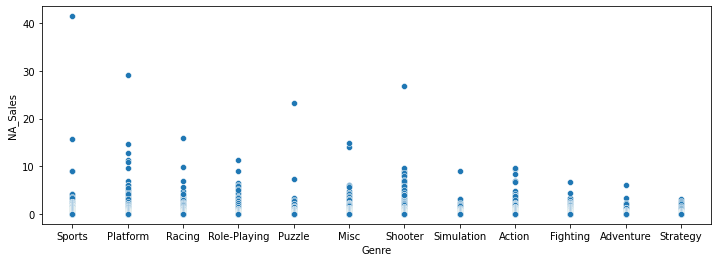

In [12]:
# seaborn plot of genre vs na sales
plt.figure(figsize=(12,4))
sns.scatterplot(x=df['Genre'], y=df['NA_Sales'])
plt.show()

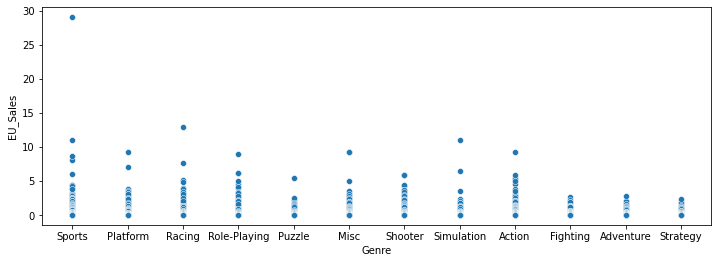

In [21]:
# seaborn plot of genre vs na sales
plt.figure(figsize=(12,4))
sns.scatterplot(x=df['Genre'], y=df['EU_Sales'])
plt.show()

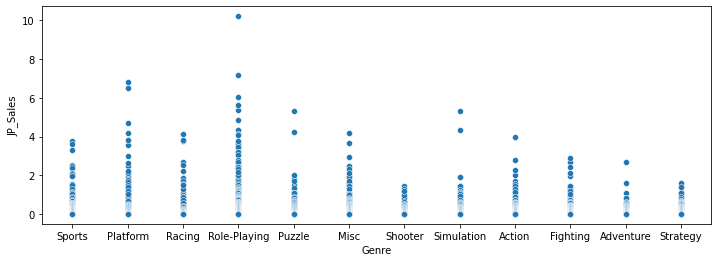

In [22]:
# seaborn plot of genre vs na sales
plt.figure(figsize=(12,4))
sns.scatterplot(x=df['Genre'], y=df['JP_Sales'])
plt.show()

<AxesSubplot:>

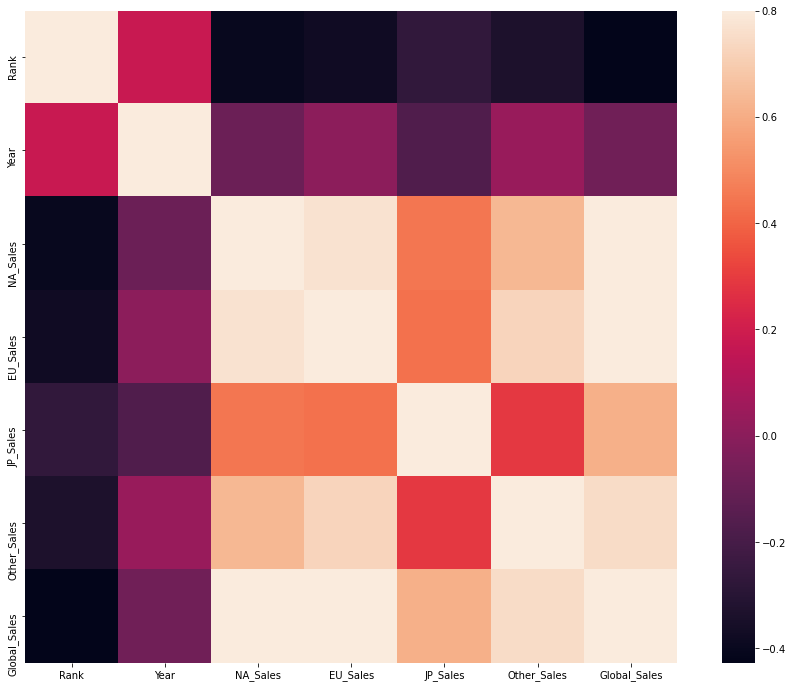

In [13]:
# few corr map for feature selection
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corrmat,vmax=.8,square=True)

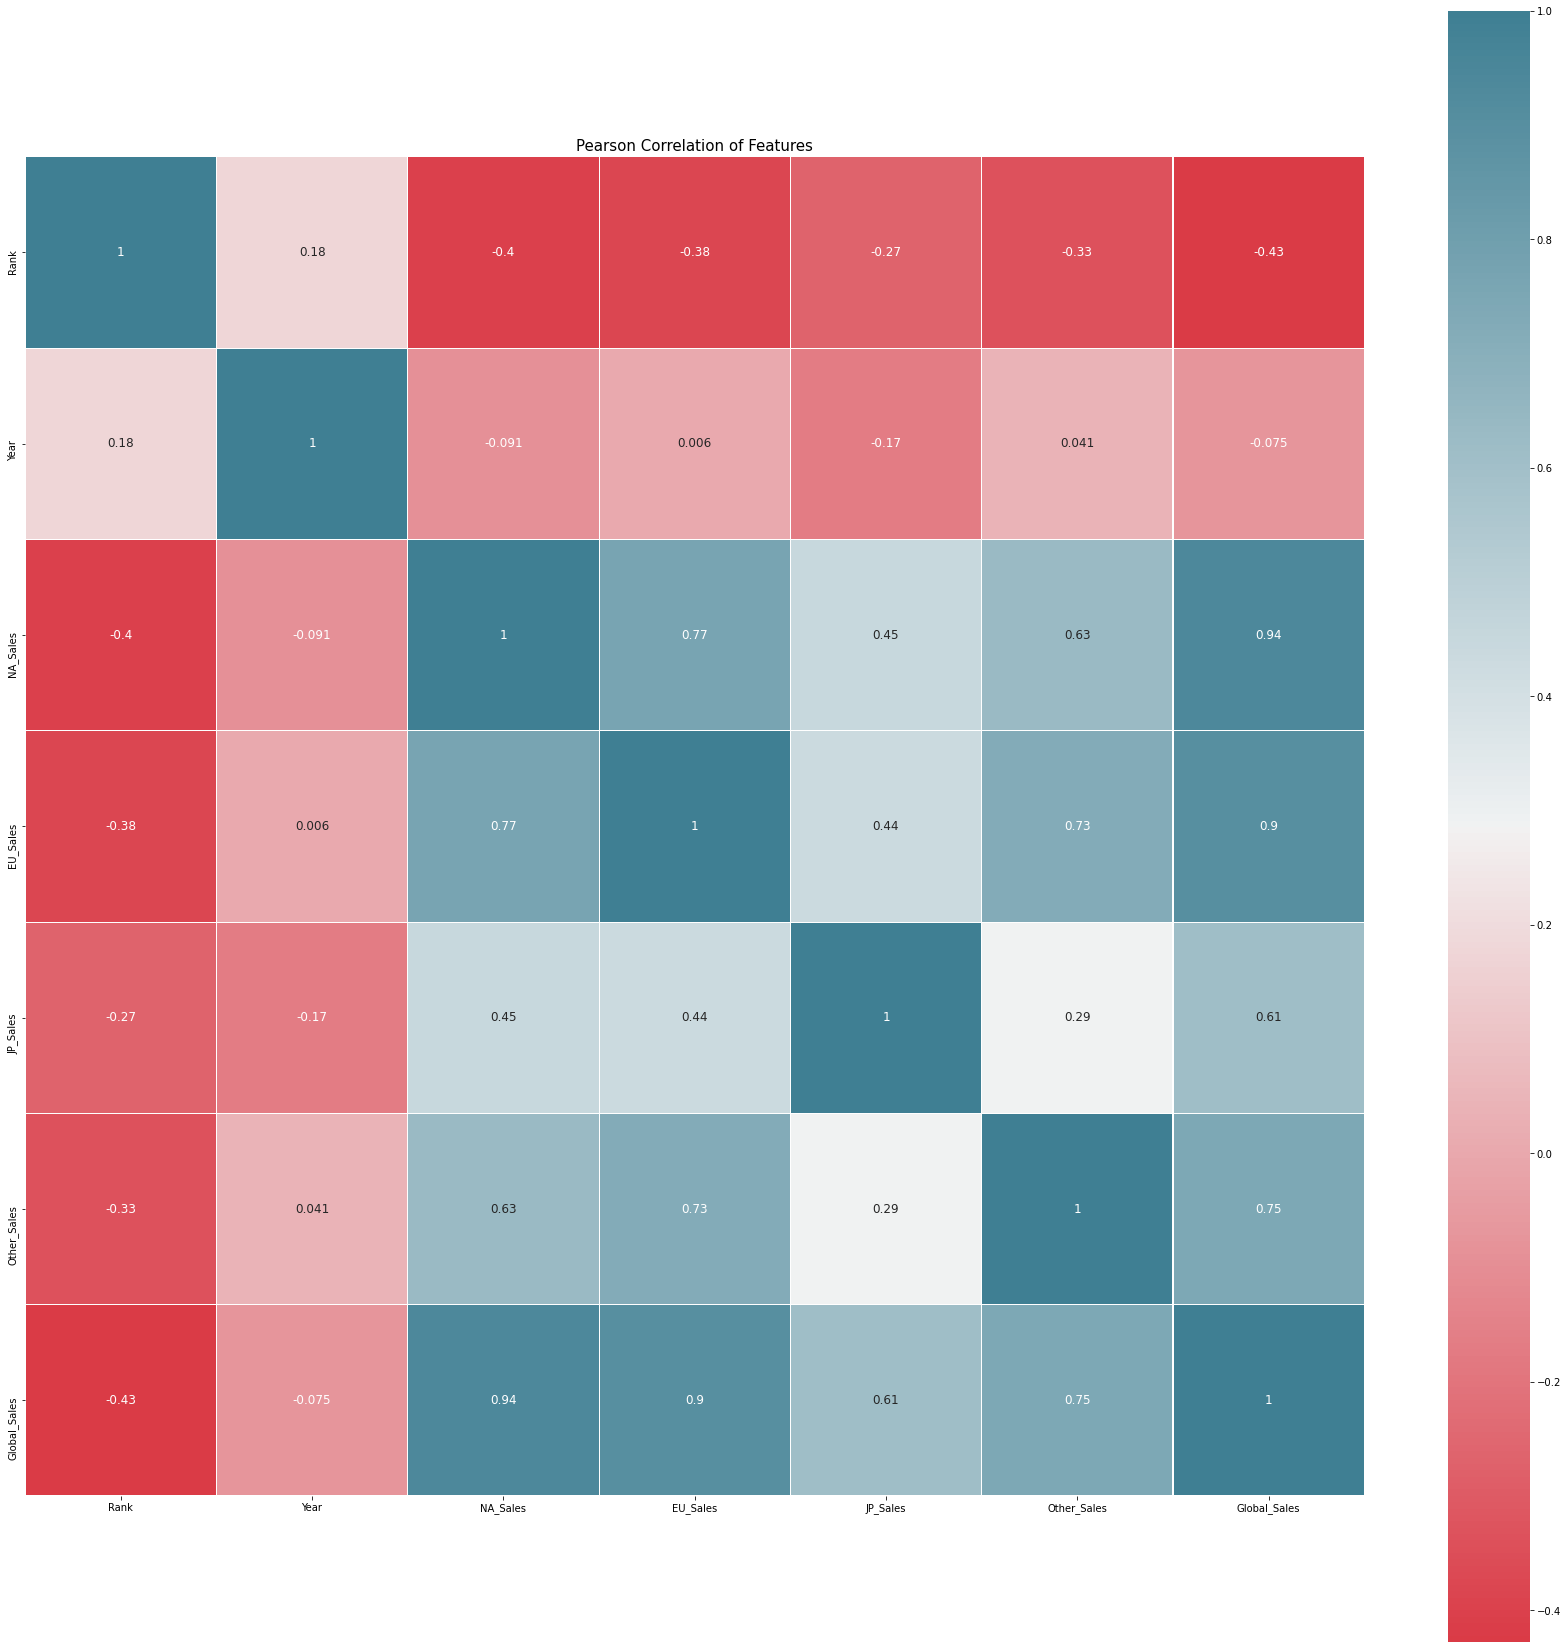

In [7]:
# other style of pearson heat map
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features', size=15)
colormap = sns.diverging_palette(10,220,as_cmap=True)
sns.heatmap(df.corr(),
           cmap=colormap,
           square=True,
           annot=True,
           linewidths=0.1,vmax=1.0,linecolor='white',
           annot_kws={'fontsize':12})
plt.show()

<AxesSubplot:>

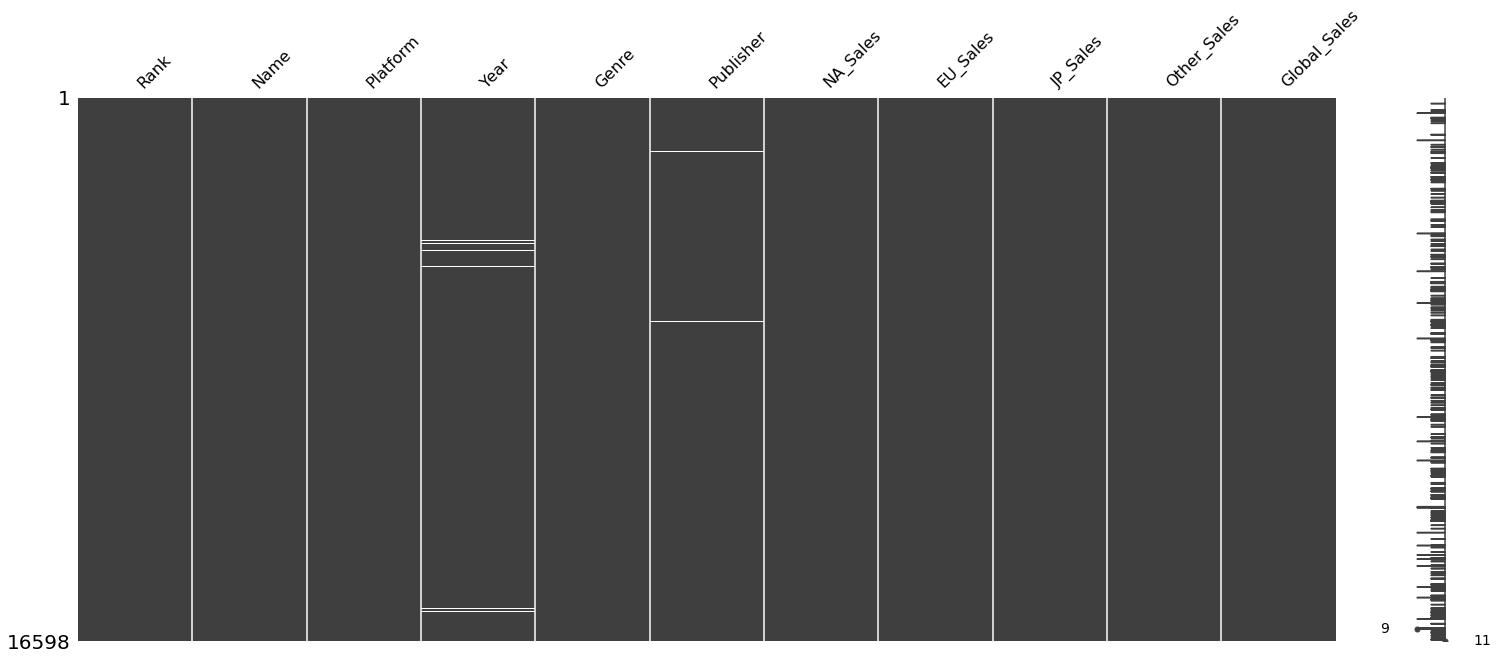

In [7]:
# null value calculation
mn.matrix(df)

In [8]:
# data cleaning
# year imputation
year_data = df['Year']
print('max year value: ', year_data.max())

max year value:  2020.0
